## ML Project Phase-1
### Reg No. 200968108

## Objective: 
Recommendation	systems	widely	exist	in	many online	applications. In this project, we try to build an web application with a simple UI that work on	a very	typical	and	classical	recommendation	system	scenario,	that is product	recommendation	in	E-commerce,	i.e.,	Amazon.

### Project description:
The data required for this project is taken from the website (http://snap.stanford.edu/data/web-Amazon-links.html). It contains	user reviews	(numerical	rating	and	textual	comment)	towards	amazon	products	on	24	product	categories(e.g.,	cell	phones, clothing,	beauty,	etc.),	and	there is	an	independent	dataset	for	each	product	category. We will select 5 product categories in this project i.e., Arts.txt.gz, Cell_Phones_&_Accessories.txt.gz, Jewelry.txt.gz, Musical_Instruments.txt.gz, Watches.txt.gz. On choosing the category of product, recommendations are displayed based on user based similarity .


After we select	a dataset	to	work	on,	this	project will	mainly	consist three	
steps:	
* Data	Processing
* create	the	training	and	testing datasets
* Conduct	rating	prediction and	make	evaluation
* Conduct	Top-N	Recommendation	

### Metadata:
Each entry	in	a	dataset	is	a	user-item	interaction	record,	including the following fields:
* product/productId:  asin, e.g. amazon.com/dp/B00006HAXW
* product/title:  title of the product
* product/price:  price of the product
* review/userId:  id of the user, e.g. A1RSDE90N6RSZF
* review/profileName:  name of the user
* review/helpfulness:  fraction of users who found the review helpful
* review/score:  rating of the product
* review/time:  time of the review (unix time)
* review/summary:  review summary
* review/text:  text of the review

#### Importing required libraries

In [1]:
import gzip
import simplejson
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings 
# Set action = "ignore" to ignore warnings
warnings.filterwarnings(action= 'ignore')

#### Parsing and converting the file into a dataframe

In [2]:
def parse(filename):
    f = gzip.open(filename, 'r')
    entry = {}
    for l in f:
        l = l.strip()
        l = l.decode()
        colonPos = l.find(':')
        if colonPos == -1:
            yield entry
            entry = {}
            continue
        eName = l[:colonPos]
        rest = l[colonPos+2:]
        entry[eName] = rest
    yield entry
    
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')
        
data = []
for e in parse("Arts.txt.gz"):
    data.append(e)
data

[{'product/productId': 'B000GKXY4S',
  'product/title': 'Crazy Shape Scissor Set',
  'product/price': 'unknown',
  'review/userId': 'A1QA985ULVCQOB',
  'review/profileName': 'Carleen M. Amadio "Lady Dragonfly"',
  'review/helpfulness': '2/2',
  'review/score': '5.0',
  'review/time': '1314057600',
  'review/summary': 'Fun for adults too!',
  'review/text': 'I really enjoy these scissors for my inspiration books that I am making (like collage, but in books) and using these different textures these give is just wonderful, makes a great statement with the pictures and sayings. Want more, perfect for any need you have even for gifts as well. Pretty cool!'},
 {'product/productId': 'B000GKXY4S',
  'product/title': 'Crazy Shape Scissor Set',
  'product/price': 'unknown',
  'review/userId': 'ALCX2ELNHLQA7',
  'review/profileName': 'Barbara',
  'review/helpfulness': '0/0',
  'review/score': '5.0',
  'review/time': '1328659200',
  'review/summary': 'Making the cut!',
  'review/text': 'Looked all

In [3]:
# Removing unnecessary attributes and renaming all the remaining columns
# for better understanding

def rename_columns(df):
    df.drop(columns =['review/time','review/profileName','review/helpfulness'],inplace = True)
    df.rename(columns= {'product/productId':'ProductID','product/title':'ProductName','product/price':'Price','review/userId':'UserID','review/score':'rating','review/summary':'review_summary','review/text':'review_text'},inplace=True)
    
    return df

In [4]:
# Importing the Arts, Cell_Phones_&_Accessories, Jewelry, Musical_Instruments
#  Watches categories of products.

df_Arts = rename_columns(getDF('Arts.txt.gz'))
df_Cell = rename_columns(getDF('Cell_Phones_&_Accessories.txt.gz'))
df_Jewel = rename_columns(getDF('Jewelry.txt.gz'))
df_Mus = rename_columns(getDF('Musical_Instruments.txt.gz'))
df_Wat = rename_columns(getDF('Watches.txt.gz'))

In [5]:
df_Arts.head()

,ProductID,ProductName,Price,UserID,rating,review_summary,review_text
0,B000GKXY4S,Crazy Shape Scissor Set,unknown,A1QA985ULVCQOB,5.0,Fun for adults too!,I really enjoy these scissors for my inspirati...
1,B000GKXY4S,Crazy Shape Scissor Set,unknown,ALCX2ELNHLQA7,5.0,Making the cut!,Looked all over in art supply and other stores...
2,B000140KIW,"Fiskars Softouch Multi-Purpose Scissors 10""",unknown,A2M2M4R1KG5WOL,5.0,"Fiskars Softouch Multi-Purpose Scissors, 10""",These are the BEST scissors I have ever owned....
3,B000140KIW,"Fiskars Softouch Multi-Purpose Scissors 10""",unknown,ARQAQ6ZYMFPCA,5.0,Best scissors ever,This Fiskars Scissors are the best i've bougth...
4,B000140KIW,"Fiskars Softouch Multi-Purpose Scissors 10""",unknown,A3FPG4LAJ1HOHZ,5.0,A great tool to make your work easier,I finally gave in and bought these after years...


In [6]:
df_Arts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27980 entries, 0 to 27979
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductID       27980 non-null  object
 1   ProductName     27980 non-null  object
 2   Price           27980 non-null  object
 3   UserID          27980 non-null  object
 4   rating          27980 non-null  object
 5   review_summary  27980 non-null  object
 6   review_text     27980 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB


There are no null values in the dataset

In [7]:
# Checking the values in the different attributes
df_Arts['Price'].value_counts()

unknown    3887
153.95     1392
199.99      596
85.00       557
74.99       321
           ... 
10.77         1
7.53          1
197.46        1
2.90          1
13.26         1
Name: Price, Length: 1731, dtype: int64

In [8]:
df_Arts['UserID'].value_counts()

unknown           230
A2D1LPEUCTNT8X     39
A22CW0ZHY3NJH8     24
A1HACP80YXJRPP     23
A1AA2CKVYW2MHE     18
                 ... 
AOJCQ9FQH9C9R       1
ATAHQF6S380CF       1
A3IDGNP3W8FM5       1
A357NWYIYE4OUQ      1
AP5WYXTYU9KRH       1
Name: UserID, Length: 24071, dtype: int64

Even though, there are no null values, there are 'unknown' values in the attributes, hence we can ignore such data

In [9]:
# Checking for unknown values in all columns and removing them.

for i in df_Arts.columns:
    df_Arts = df_Arts[df_Arts[i]!='unknown']
print(df_Arts.shape)

# we can also drop duplicate values if there are any.

df_Arts.drop_duplicates(inplace=True)
print(df_Arts.shape)

(23983, 7)
(23957, 7)


In [10]:
# converting price and rating columns to numeric and observing descriptive statistics
df_Arts['Price'] = pd.to_numeric(df_Arts['Price'])
df_Arts['rating'] = pd.to_numeric(df_Arts['rating'])

In [11]:
df_Arts.describe()

,Price,rating
count,23957.000000,23957.000000
mean,40.081881,4.158451
std,55.768967,1.301811
min,0.010000,1.000000
25%,7.210000,4.000000
50%,14.950000,5.000000
75%,42.500000,5.000000
max,890.000000,5.000000


In [12]:
df_Arts['review_summary'].describe()

count             23957
unique            18044
top       Great product
freq                 83
Name: review_summary, dtype: object

In [13]:
df_Arts['review_text'].describe()

count                                                 23957
unique                                                21990
top       My son's #1 fave color is purple. So I was a l...
freq                                                     17
Name: review_text, dtype: object

<AxesSubplot:xlabel='rating', ylabel='count'>

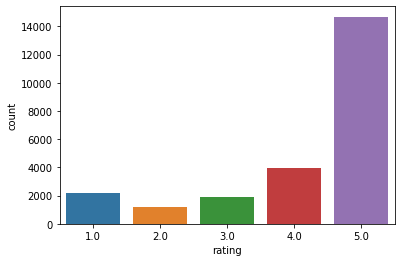

In [14]:
# Vizualising the distribution of overall product ratings

sns.countplot(df_Arts['rating'])

We can observe that most of the users gave a rating of 5

In [15]:
# Count of total ratings,users and products
print("\nTotal no of ratings :",df_Arts.shape[0])
print("Total No of Users   :", len(np.unique(df_Arts.UserID)))
print("Total No of products  :", len(np.unique(df_Arts.ProductID)))


Total no of ratings : 23957
Total No of Users   : 20693
Total No of products  : 3264


In [16]:
#Analysis of rating given by the user 
rating_per_user = df_Arts.groupby(by='UserID')['rating'].count().sort_values(ascending=False)
rating_per_user.head()

UserID
A2D1LPEUCTNT8X    37
A1HACP80YXJRPP    23
A22CW0ZHY3NJH8    21
A1AA2CKVYW2MHE    18
A1D86BN68B148L    17
Name: rating, dtype: int64

In [17]:
#Analysis of rating given to the product 
rating_per_product = df_Arts.groupby(by='ProductID')['rating'].count().sort_values(ascending=False)
rating_per_product.head()

ProductID
B000JQM1DE    1390
B0000CBK1L     596
B000F7DPEQ     557
B000EOX28E     321
B0002KHBS2     220
Name: rating, dtype: int64

### Text cleaning

In [18]:
contractions={
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how're": "how are",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you shall have",
    "you're": "you are",
    "you've": "you have",
    "doin'": "doing",
    "goin'": "going",
    "nothin'": "nothing",
    "somethin'": "something",
}

In [19]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [20]:
df_Arts["review_text"] = df_Arts["review_text"].apply(lambda x:cont_to_exp(x))
df_Arts["review_summary"] = df_Arts["review_summary"].apply(lambda x:cont_to_exp(x))

In [21]:
# Splitting the summary and text into list of words
df_Arts['review_summary'] = df_Arts['review_summary'].apply(lambda x:x.split())
df_Arts['review_text'] = df_Arts['review_text'].apply(lambda x:x.split())

In [22]:
# removing white spaces between the words in summary and text
df_Arts['review_summary'] = df_Arts['review_summary'].apply(lambda x:[i.replace(" ","") for i in x])
df_Arts['review_text'] = df_Arts['review_text'].apply(lambda x:[i.replace(" ","") for i in x])

In [23]:
# merging both the lists of words of review_summary and review_text under 
# a single column tags
df_Arts['tags'] = df_Arts['review_summary'] + df_Arts['review_text']

In [24]:
new_Arts = df_Arts[['UserID','ProductID','rating','tags']]
new_Arts['tags']  = new_Arts['tags'].apply(lambda x:" ".join(x))
print(new_Arts.shape)
new_Arts.head()

(23957, 4)


,UserID,ProductID,rating,tags
7,A2PXVMF9DH8NDZ,B000G6HRZE,3.0,"Not Very Sharp Like the previous reviewer, I w..."
8,A1YUL9PCJR3JTY,B000G6HRZE,4.0,Nice Large Basic Safety Pins ****These are you...
9,A2B6I0N8RNAQXJ,B000G6HRZE,5.0,Great Safety Pins These Dritz(R) Extra Large S...
10,A2FMZ7LFWTZCJ4,B000G6HRZE,4.0,When you need a safety pin... We are organizin...
11,A1AUXDAAZR2VNT,B000G6HRZE,1.0,Safety pins As another reviewer noted these do...


### Defining functions for pre-processing and text cleaning instead of writing entire code for each dataset

In [25]:
def preprocessing(df):
    print("Quick summary of the dataset: \n")
    df.info()
    
    print("\n\nChecking the values in the 'price' attribute\n")
    print(pd.DataFrame(df['Price'].value_counts()))
    print("\n\nChecking the values in the 'UserID' attribute\n")
    print(df['UserID'].value_counts())
    
    print("\nChecking for unknown values in all columns and removing them.\n")

    for i in df.columns:
        df = df[df[i]!='unknown']
    print("Shape: ")
    print(df.shape)

    # we can also drop duplicate values if there are any.
    print("\nwe can also drop duplicate values if there are any.\n")
    #df.drop_duplicates(inplace=True)
    print("Shape: ")
    print(df.shape)
    
    print("\nconverting price and rating columns to numeric and observing descriptive statistics\n")
    df['Price'] = pd.to_numeric(df['Price'])
    df['rating'] = pd.to_numeric(df['rating'])
    
    print(df.describe())
    print("\nDescriptive statistics for summary\n")
    print(df['review_summary'].describe())
    print("\nDescriptive statistics for text\n")
    print(df['review_text'].describe())
    
    
    
    print("\nCount of total ratings,users and products\n")
    print("\nTotal no of ratings :",df.shape[0])
    print("Total No of Users   :", len(np.unique(df.UserID)))
    print("Total No of products  :", len(np.unique(df.ProductID)))
    
    print("\nAnalysis of rating given by the user \n")
    rating_per_user = df.groupby(by='UserID')['rating'].count().sort_values(ascending=False)
    print(rating_per_user.head())
    
    
    print("\nAnalysis of rating given to the product \n")
    rating_per_product = df.groupby(by='ProductID')['rating'].count().sort_values(ascending=False)
    print(rating_per_product.head())
    
    print("\nVizualising the distribution of overall product ratings\n")

    print(sns.countplot(df['rating']))
    
    return df

In [26]:
def text_cleaning(df):
    contractions={
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how're": "how are",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you shall have",
    "you're": "you are",
    "you've": "you have",
    "doin'": "doing",
    "goin'": "going",
    "nothin'": "nothing",
    "somethin'": "something",}
    
    def cont_to_exp(x):
        if type(x) is str:
            x = x.replace('\\','')
            for key in contractions:
                value = contractions[key]
                x = x.replace(key, value)
            return x
        else:
            return x
    
    df["review_text"] = df["review_text"].apply(lambda x:cont_to_exp(x))
    df["review_summary"] = df["review_summary"].apply(lambda x:cont_to_exp(x))
    print(df.head())
    
    print("\n\nSplitting the summary and text into list of words\n\n")
    #df['review_summary'] = df['review_summary'].apply(lambda x:x.split())
    #df['review_text'] = df['review_text'].apply(lambda x:x.split())
    print(df.head())
    
    print("\n\nRemoving white spaces between the words in summary and text\n\n")
    df['review_summary'] = df['review_summary'].apply(lambda x:[i.replace(" ","") for i in x])
    df['review_text'] = df['review_text'].apply(lambda x:[i.replace(" ","") for i in x])
    print(df.head())
    
    print("\nmerging both the lists of words of review_summary and review_text under a single column tags\n")
    df['tags'] = df['review_summary'] + df['review_text']
    print(df.head())
    
    print("\nCreating new dataframe with UserID, productID, rating and tags\n")
    new = df[['UserID','ProductID','rating','tags']]
    new['tags']  = new['tags'].apply(lambda x:" ".join(x))
    print(new.shape)
    print(new.head())
    
    return new
    

Quick summary of the dataset: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23957 entries, 7 to 27979
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductID       23957 non-null  object 
 1   ProductName     23957 non-null  object 
 2   Price           23957 non-null  float64
 3   UserID          23957 non-null  object 
 4   rating          23957 non-null  float64
 5   review_summary  23957 non-null  object 
 6   review_text     23957 non-null  object 
 7   tags            23957 non-null  object 
dtypes: float64(2), object(6)
memory usage: 2.1+ MB


Checking the values in the 'price' attribute

        Price
153.95   1390
199.99    596
85.00     557
74.99     321
6.99      264
...       ...
213.50      1
6.03        1
22.31       1
19.98       1
1.71        1

[1730 rows x 1 columns]


Checking the values in the 'UserID' attribute

A2D1LPEUCTNT8X    37
A1HACP80YXJRPP    23
A22CW0ZHY3NJH8    21
A1AA2

,ProductID,ProductName,Price,UserID,rating,review_summary,review_text,tags
7,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A2PXVMF9DH8NDZ,3.0,"[Not, Very, Sharp]","[Like, the, previous, reviewer,, I, was, very,...","[Not, Very, Sharp, Like, the, previous, review..."
8,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A1YUL9PCJR3JTY,4.0,"[Nice, Large, Basic, Safety, Pins]","[****These, are, your, basic, large, safety, p...","[Nice, Large, Basic, Safety, Pins, ****These, ..."
9,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A2B6I0N8RNAQXJ,5.0,"[Great, Safety, Pins]","[These, Dritz(R), Extra, Large, Safety, Pins, ...","[Great, Safety, Pins, These, Dritz(R), Extra, ..."
10,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A2FMZ7LFWTZCJ4,4.0,"[When, you, need, a, safety, pin...]","[We, are, organizing, our, costume, stock, and...","[When, you, need, a, safety, pin..., We, are, ..."
11,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A1AUXDAAZR2VNT,1.0,"[Safety, pins]","[As, another, reviewer, noted, these, do, not,...","[Safety, pins, As, another, reviewer, noted, t..."
...,...,...,...,...,...,...,...,...
27975,B000LFEI2K,"Makin's USA Clay Cutters, Airplane, 3 Per Package",5.97,A360ESH9H7EYHG,5.0,"[Just, as, pictured;, clean, cut]","[Used, the, two, smallest, cutters, to, make, ...","[Just, as, pictured;, clean, cut, Used, the, t..."
27976,B000G6HRT0,Collins Pin Cushion Strawberry Emery,1.40,A2SQI5NLZFGF85,5.0,"[Working, Strawberry]","[My, straight, needles, were, getting, to, the...","[Working, Strawberry, My, straight, needles, w..."
27977,B000G6HRT0,Collins Pin Cushion Strawberry Emery,1.40,A3DSLYMEG97NOK,5.0,"[Strawberry, Emery]","[This, item, arrived, promptly,, and, in, good...","[Strawberry, Emery, This, item, arrived, promp..."
27978,B000MAPM2O,Jolee's Boutique Themed Ornate Dimensional Sti...,5.46,ABYAIU78NKAZL,4.0,"[Item, was, great....I, sure, paid, too, much,...","[I, loved, the, item, and, it, arrived, quickl...","[Item, was, great....I, sure, paid, too, much,..."


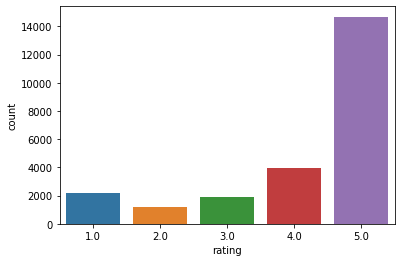

In [27]:
df1 = preprocessing(df_Arts)
df1

In [28]:
df11 = text_cleaning(df1)
df11

     ProductID                                     ProductName  Price  \
7   B000G6HRZE  Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg   4.43   
8   B000G6HRZE  Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg   4.43   
9   B000G6HRZE  Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg   4.43   
10  B000G6HRZE  Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg   4.43   
11  B000G6HRZE  Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg   4.43   

            UserID  rating                        review_summary  \
7   A2PXVMF9DH8NDZ     3.0                    [Not, Very, Sharp]   
8   A1YUL9PCJR3JTY     4.0    [Nice, Large, Basic, Safety, Pins]   
9   A2B6I0N8RNAQXJ     5.0                 [Great, Safety, Pins]   
10  A2FMZ7LFWTZCJ4     4.0  [When, you, need, a, safety, pin...]   
11  A1AUXDAAZR2VNT     1.0                        [Safety, pins]   

                                          review_text  \
7   [Like, the, previous, reviewer,, I, was, very,...   
8   [****These, are, your, basic, larg

,UserID,ProductID,rating,tags
7,A2PXVMF9DH8NDZ,B000G6HRZE,3.0,"Not Very Sharp Like the previous reviewer, I w..."
8,A1YUL9PCJR3JTY,B000G6HRZE,4.0,Nice Large Basic Safety Pins ****These are you...
9,A2B6I0N8RNAQXJ,B000G6HRZE,5.0,Great Safety Pins These Dritz(R) Extra Large S...
10,A2FMZ7LFWTZCJ4,B000G6HRZE,4.0,When you need a safety pin... We are organizin...
11,A1AUXDAAZR2VNT,B000G6HRZE,1.0,Safety pins As another reviewer noted these do...
...,...,...,...,...
27975,A360ESH9H7EYHG,B000LFEI2K,5.0,Just as pictured; clean cut Used the two small...
27976,A2SQI5NLZFGF85,B000G6HRT0,5.0,Working Strawberry My straight needles were ge...
27977,A3DSLYMEG97NOK,B000G6HRT0,5.0,"Strawberry Emery This item arrived promptly, a..."
27978,ABYAIU78NKAZL,B000MAPM2O,4.0,Item was great....I sure paid too much for shi...


In [29]:
# df_Cell = rename_columns(getDF('Cell_Phones_&_Accessories.txt.gz'))
# df_Jewel = rename_columns(getDF('Jewelry.txt.gz'))
# df_Mus = rename_columns(getDF('Musical_Instruments.txt.gz'))
# df_Wat = rename_columns(getDF('Watches.txt.gz'))

Quick summary of the dataset: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78930 entries, 0 to 78929
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductID       78930 non-null  object
 1   ProductName     78930 non-null  object
 2   Price           78930 non-null  object
 3   UserID          78930 non-null  object
 4   rating          78930 non-null  object
 5   review_summary  78930 non-null  object
 6   review_text     78930 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB


Checking the values in the 'price' attribute

         Price
unknown  43287
89.99     3452
29.99     1099
6.99       851
19.99      755
...        ...
3.02         1
29.68        1
29.58        1
11.07        1
4.15         1

[944 rows x 1 columns]


Checking the values in the 'UserID' attribute

unknown           2276
A1RCGK44YXNBBB      44
A5JLAU2ARJ0BO       44
A2C8IPPOF90CJG      38
A33FS5H3CPDR6D      31
        

,ProductID,ProductName,Price,UserID,rating,review_summary,review_text
19,B000B6MY2U,Samsung T809 M620 i607 U420 A303 A717 Car Char...,6.75,A1RCOK89DON3YN,5.0,Great Buy!!,I thought this item was great for the money. I...
20,B000B6MY2U,Samsung T809 M620 i607 U420 A303 A717 Car Char...,6.75,A1IDTV3JKFOLVT,4.0,Charger works great,The charger works fine as advertised. The loca...
30,B00004WINT,Jabra EarGels - Clear,9.70,A29UBSC2VMDUL4,5.0,Jawbone Ear Fix,If you have had an issue with the Jawbone head...
31,B00004WINT,Jabra EarGels - Clear,9.70,A7QCUJOH9CIYR,5.0,Jabra gels fit well on my aliph jawbone after ...,I accidentally tore the original factory bud o...
32,B00004WINT,Jabra EarGels - Clear,9.70,AX73D8OAWC7TF,4.0,Fit is execellent.,Used these to replace the painfuly uncomfortab...
...,...,...,...,...,...,...,...
78798,B0007XCT22,Maxell P-10 Cassette Adapter,10.13,A1BD4AEN06FFMJ,1.0,"DON""T BUY. Or You WIll Regret.",I do not leave feedback of any kind on amazon....
78799,B0007XCT22,Maxell P-10 Cassette Adapter,10.13,A3V6Z4RCDGRC44,5.0,Get 2 or 3 of them,If you've ever used any sort of cassette tape ...
78800,B0007XCT22,Maxell P-10 Cassette Adapter,10.13,AWTOK5EK2M1BF,5.0,Get the tape before you choose a more expensiv...,"Seriously,A Tape adapter is CHEAP, its easy, a..."
78801,B000MO0JCI,"Cell Phone Battery for Samsung D500 Li-Ion, Li...",12.69,A8XRINNUX92NY,1.0,Never got it...,1 month and 2 days later i still havent reciev...


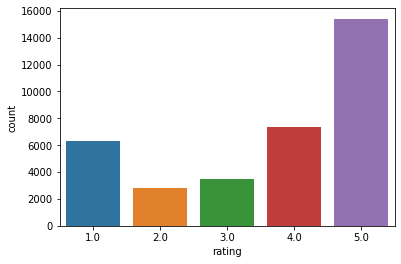

In [30]:
df2 = preprocessing(df_Cell)
df2

In [31]:
df22 = text_cleaning(df2)
df22

     ProductID                                        ProductName  Price  \
19  B000B6MY2U  Samsung T809 M620 i607 U420 A303 A717 Car Char...   6.75   
20  B000B6MY2U  Samsung T809 M620 i607 U420 A303 A717 Car Char...   6.75   
30  B00004WINT                              Jabra EarGels - Clear   9.70   
31  B00004WINT                              Jabra EarGels - Clear   9.70   
32  B00004WINT                              Jabra EarGels - Clear   9.70   

            UserID  rating                                     review_summary  \
19  A1RCOK89DON3YN     5.0                                        Great Buy!!   
20  A1IDTV3JKFOLVT     4.0                                Charger works great   
30  A29UBSC2VMDUL4     5.0                                    Jawbone Ear Fix   
31   A7QCUJOH9CIYR     5.0  Jabra gels fit well on my aliph jawbone after ...   
32   AX73D8OAWC7TF     4.0                                 Fit is execellent.   

                                          review_text  


,UserID,ProductID,rating,tags
19,A1RCOK89DON3YN,B000B6MY2U,5.0,G r e a t B u y ! ! I t h o u g h t t h i s...
20,A1IDTV3JKFOLVT,B000B6MY2U,4.0,C h a r g e r w o r k s g r e a t T h e c h...
30,A29UBSC2VMDUL4,B00004WINT,5.0,J a w b o n e E a r F i x I f y o u h a v ...
31,A7QCUJOH9CIYR,B00004WINT,5.0,J a b r a g e l s f i t w e l l o n m y ...
32,AX73D8OAWC7TF,B00004WINT,4.0,F i t i s e x e c e l l e n t . U s e d t h...
...,...,...,...,...
78798,A1BD4AEN06FFMJ,B0007XCT22,1.0,"D O N "" T B U Y . O r Y o u W I l l R e g..."
78799,A3V6Z4RCDGRC44,B0007XCT22,5.0,G e t 2 o r 3 o f t h e m I f y o u h a...
78800,AWTOK5EK2M1BF,B0007XCT22,5.0,G e t t h e t a p e b e f o r e y o u c h...
78801,A8XRINNUX92NY,B000MO0JCI,1.0,N e v e r g o t i t . . . 1 m o n t h a n ...


Quick summary of the dataset: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58621 entries, 0 to 58620
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductID       58621 non-null  object
 1   ProductName     58621 non-null  object
 2   Price           58621 non-null  object
 3   UserID          58621 non-null  object
 4   rating          58621 non-null  object
 5   review_summary  58621 non-null  object
 6   review_text     58621 non-null  object
dtypes: object(7)
memory usage: 3.6+ MB


Checking the values in the 'price' attribute

         Price
unknown  29039
14.99     1070
20.99      761
13.57      700
39.99      600
...        ...
36.13        1
201.05       1
41.28        1
95.84        1
62.38        1

[1997 rows x 1 columns]


Checking the values in the 'UserID' attribute

unknown           431
A31DVKL8JE4XAH     57
A18XQ3IHV38Y9P     51
A3OT58KJD1DRFB     43
A20VLC1J0OZ5H2     43
            

,ProductID,ProductName,Price,UserID,rating,review_summary,review_text
10,B000L3RWXE,Purple Genuine Russian Charoite and Rainbow Mo...,69.99,A2X6ADHDF17MQB,4.0,Dainty,"This item is very beautiful and dainty, but a ..."
11,B000L3RWXE,Purple Genuine Russian Charoite and Rainbow Mo...,69.99,A1PKH1VARVC8R8,4.0,beautiful,I love this pendant. My only complaint was tha...
12,B000L3RWXE,Purple Genuine Russian Charoite and Rainbow Mo...,69.99,A480GWA0CM6ZU,5.0,"Bought as gift, beautiful...",I bought this for my mother and she loves it. ...
13,B000L3RWXE,Purple Genuine Russian Charoite and Rainbow Mo...,69.99,A1T4TZB1CJNUUL,5.0,Love it!,I am very happy with the weight and quality of...
14,B0006SE2Q4,Sterling Silver Garnet Lady Knight Armor Ring(...,34.97,A2T8TQ8EXVCCFF,5.0,Excellent value!,I decided to write a review for this product a...
...,...,...,...,...,...,...,...
58575,B000FIPQO2,Rembrandt Charms Pig Charm,428.00,A3THPD95YCTE7,2.0,Golden Pig in Chinese New Year,Was surprised to find red eyes on the pig. Did...
58576,B000FIPQO2,Rembrandt Charms Pig Charm,428.00,A1PWQ8OXFYGOA3,5.0,Year of the Pig-2007,I purchased this delightful charm and have enj...
58587,B000FIPQRY,Rembrandt Charms Buffalo Charm,369.00,A3VY2OGE4Z5HQB,5.0,Love it!,"I received my buffalo charm today, and I am ex..."
58590,B000FIPQRE,Rembrandt Charms Horse Charm,463.00,A2TY6RZA4E9S49,5.0,"Nice, sturdy charms",They offer good quality and good weight charms...


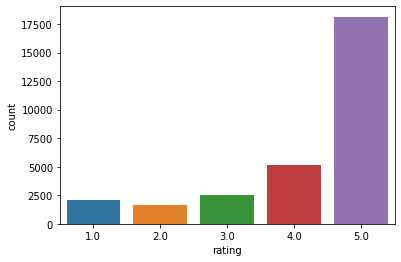

In [32]:

df3 = preprocessing(df_Jewel)
df3

In [33]:
df33 = text_cleaning(df3)
df33

     ProductID                                        ProductName  Price  \
10  B000L3RWXE  Purple Genuine Russian Charoite and Rainbow Mo...  69.99   
11  B000L3RWXE  Purple Genuine Russian Charoite and Rainbow Mo...  69.99   
12  B000L3RWXE  Purple Genuine Russian Charoite and Rainbow Mo...  69.99   
13  B000L3RWXE  Purple Genuine Russian Charoite and Rainbow Mo...  69.99   
14  B0006SE2Q4  Sterling Silver Garnet Lady Knight Armor Ring(...  34.97   

            UserID  rating                review_summary  \
10  A2X6ADHDF17MQB     4.0                        Dainty   
11  A1PKH1VARVC8R8     4.0                     beautiful   
12   A480GWA0CM6ZU     5.0  Bought as gift, beautiful...   
13  A1T4TZB1CJNUUL     5.0                      Love it!   
14  A2T8TQ8EXVCCFF     5.0              Excellent value!   

                                          review_text  
10  This item is very beautiful and dainty, but a ...  
11  I love this pendant. My only complaint was tha...  
12  I bought t

,UserID,ProductID,rating,tags
10,A2X6ADHDF17MQB,B000L3RWXE,4.0,D a i n t y T h i s i t e m i s v e r y b ...
11,A1PKH1VARVC8R8,B000L3RWXE,4.0,b e a u t i f u l I l o v e t h i s p e n d...
12,A480GWA0CM6ZU,B000L3RWXE,5.0,"B o u g h t a s g i f t , b e a u t i f u l..."
13,A1T4TZB1CJNUUL,B000L3RWXE,5.0,L o v e i t ! I a m v e r y h a p p y w i...
14,A2T8TQ8EXVCCFF,B0006SE2Q4,5.0,E x c e l l e n t v a l u e ! I d e c i d e ...
...,...,...,...,...
58575,A3THPD95YCTE7,B000FIPQO2,2.0,G o l d e n P i g i n C h i n e s e N e w ...
58576,A1PWQ8OXFYGOA3,B000FIPQO2,5.0,Y e a r o f t h e P i g - 2 0 0 7 I p u r ...
58587,A3VY2OGE4Z5HQB,B000FIPQRY,5.0,L o v e i t ! I r e c e i v e d m y b u f ...
58590,A2TY6RZA4E9S49,B000FIPQRE,5.0,"N i c e , s t u r d y c h a r m s T h e y o..."


Quick summary of the dataset: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85405 entries, 0 to 85404
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductID       85405 non-null  object
 1   ProductName     85405 non-null  object
 2   Price           85405 non-null  object
 3   UserID          85405 non-null  object
 4   rating          85405 non-null  object
 5   review_summary  85405 non-null  object
 6   review_text     85405 non-null  object
dtypes: object(7)
memory usage: 5.2+ MB


Checking the values in the 'price' attribute

         Price
unknown  19152
29.99     1071
19.99      868
14.99      711
6.99       706
...        ...
339.33       1
55.72        1
20.41        1
27.21        1
297.00       1

[3686 rows x 1 columns]


Checking the values in the 'UserID' attribute

unknown           996
A2NYK9KWFMJV4Y     75
AL3G7RTXMGLDQ      66
A3SMT15X2QVUR8     64
A2I3A2R16A5QIN     36
            

,ProductID,ProductName,Price,UserID,rating,review_summary,review_text
0,B0009F5ZXS,Dimarzio Virtual Hot PAF Bridge - Black Finish...,69.00,A3915SRVUGEXY5,3.0,Wrong pickup description,"The name and description of this Pickup, Virtu..."
1,B000EENAE0,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,60.74,A31KXTOQNTWUVM,5.0,Now I won't have to invest in a Leslie speaker!,No other way to put it: this thing is WONDERFU...
2,B000EENAE0,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,60.74,A1EJ0E61P5F3YL,4.0,Fun Toy,This effect has an interesting sound somewhere...
3,B000EENAE0,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,60.74,A30ROM67HSGKWL,5.0,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,This pedal is cheaply made but it sounds terri...
4,B000EENAE0,Danelectro DJ-20C Rocky Road Spin Speaker Mini...,60.74,AGETSICLTBAQO,5.0,Leslie in a nutshell,Danelectro DJ-20C Rocky Road Spin Speaker Mini...
...,...,...,...,...,...,...,...
85390,B0002Z2CZY,Wedgie WRPP31M 3.1mm Medium Wedgie Rubber Pick...,2.96,A2U7WPFX65D5LH,3.0,"Good, but not for 12 string's",My boyfriend (whom I bought these for) loved t...
85391,B0002Z2CZY,Wedgie WRPP31M 3.1mm Medium Wedgie Rubber Pick...,2.96,A1O0A7056Q35Y8,1.0,grip and grab,"No,no no. This is a bad idea. the pick does no..."
85393,B0007R998K,EVH D Tuna Guitar Drop Tuner,37.99,AOM61DD01U4DT,4.0,"Very cool, just make sure its compatible",It works as advertised IF you have a compatibl...
85394,B0007R998K,EVH D Tuna Guitar Drop Tuner,37.99,A3ISZBCYE9PSIO,5.0,Love it,Seemless dropping to D and back to E. Becarefu...


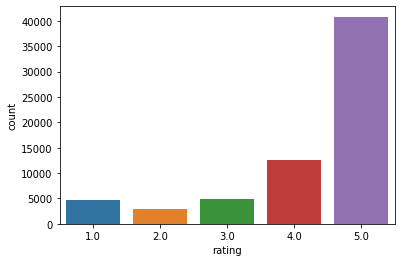

In [34]:
df4 = preprocessing(df_Mus)
df4

In [35]:
df44 = text_cleaning(df4)
df44

    ProductID                                        ProductName  Price  \
0  B0009F5ZXS  Dimarzio Virtual Hot PAF Bridge - Black Finish...  69.00   
1  B000EENAE0  Danelectro DJ-20C Rocky Road Spin Speaker Mini...  60.74   
2  B000EENAE0  Danelectro DJ-20C Rocky Road Spin Speaker Mini...  60.74   
3  B000EENAE0  Danelectro DJ-20C Rocky Road Spin Speaker Mini...  60.74   
4  B000EENAE0  Danelectro DJ-20C Rocky Road Spin Speaker Mini...  60.74   

           UserID  rating                                     review_summary  \
0  A3915SRVUGEXY5     3.0                           Wrong pickup description   
1  A31KXTOQNTWUVM     5.0  Now I will not have to invest in a Leslie spea...   
2  A1EJ0E61P5F3YL     4.0                                            Fun Toy   
3  A30ROM67HSGKWL     5.0  Danelectro DJ-20C Rocky Road Spin Speaker Mini...   
4   AGETSICLTBAQO     5.0                               Leslie in a nutshell   

                                         review_text  
0  The name a

,UserID,ProductID,rating,tags
0,A3915SRVUGEXY5,B0009F5ZXS,3.0,W r o n g p i c k u p d e s c r i p t i o n ...
1,A31KXTOQNTWUVM,B000EENAE0,5.0,N o w I w i l l n o t h a v e t o i n v ...
2,A1EJ0E61P5F3YL,B000EENAE0,4.0,F u n T o y T h i s e f f e c t h a s a n ...
3,A30ROM67HSGKWL,B000EENAE0,5.0,D a n e l e c t r o D J - 2 0 C R o c k y R...
4,AGETSICLTBAQO,B000EENAE0,5.0,L e s l i e i n a n u t s h e l l D a n e l...
...,...,...,...,...
85390,A2U7WPFX65D5LH,B0002Z2CZY,3.0,"G o o d , b u t n o t f o r 1 2 s t r i n..."
85391,A1O0A7056Q35Y8,B0002Z2CZY,1.0,"g r i p a n d g r a b N o , n o n o . T h ..."
85393,AOM61DD01U4DT,B0007R998K,4.0,"V e r y c o o l , j u s t m a k e s u r e ..."
85394,A3ISZBCYE9PSIO,B0007R998K,5.0,L o v e i t S e e m l e s s d r o p p i n g ...


Quick summary of the dataset: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68356 entries, 0 to 68355
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductID       68356 non-null  object
 1   ProductName     68356 non-null  object
 2   Price           68356 non-null  object
 3   UserID          68356 non-null  object
 4   rating          68356 non-null  object
 5   review_summary  68356 non-null  object
 6   review_text     68356 non-null  object
dtypes: object(7)
memory usage: 4.2+ MB


Checking the values in the 'price' attribute

         Price
unknown  30795
28.92      724
79.85      685
14.88      684
87.00      582
...        ...
60.99        1
83.02        1
11.90        1
420.95       1
699.00       1

[1069 rows x 1 columns]


Checking the values in the 'UserID' attribute

unknown           322
A2FOTUD89BSEMJ     29
AJH7ESS9UQ99L      29
A3W4D8XOGLWUN5     20
AQMEGPV4SMZAU      20
            

,ProductID,ProductName,Price,UserID,rating,review_summary,review_text
14,B000PDESIM,Momentum Men's 1M-DV50S1 M50 DSS Silver Dial B...,294.95,AZMDNMPDWLLI3,5.0,"Tough, Good Looking Watch!",I purchased a Momentum M1 diver's watch for my...
21,B0007OEQZO,Citizen Women's EG2280-51E Eco-Drive Charm Bra...,99.99,A2WRNZRR891JYA,5.0,$265 watch at $65!!! its a steal :),U cant get such a watch at much cheaper price....
22,B0007OEQZO,Citizen Women's EG2280-51E Eco-Drive Charm Bra...,99.99,A29H29DRLPLQHS,5.0,cute watch,"The watch is nice and cute, i love it. but the..."
23,B0007OEQZO,Citizen Women's EG2280-51E Eco-Drive Charm Bra...,99.99,A3P3IZ23ULHRFW,5.0,What a gorgeous watch!!! (for $65),I have been looking for a new dress watch for ...
24,B0007OEQZO,Citizen Women's EG2280-51E Eco-Drive Charm Bra...,99.99,A8VPWEUHAUDMU,5.0,Beautiful Eco-Drive watch,"It's a nice looking watch, Normally I check wa..."
...,...,...,...,...,...,...,...
68340,B000HX2X1O,Bulova Women's 96R28 Marine Star Diamond Watch,325.00,AVI205DG7EPL1,5.0,Excellent Watch,I bought this watch couple of years ago and hi...
68341,B000HX2X1O,Bulova Women's 96R28 Marine Star Diamond Watch,325.00,A3NBHG35DAJV0C,5.0,Bulova women's marine star diamond watch#96R28,"This is a beautiful watch ,a present for my da..."
68342,B000HX2X14,Bulova Women's 98W03 Diamond Gold-Tone Steel W...,235.00,A2ENKMMP4T30K9,3.0,Check the band size before ordering.,"Unfortunately, I had to return this watch. The..."
68343,B000HX2X14,Bulova Women's 98W03 Diamond Gold-Tone Steel W...,235.00,A1ZABTAL4DGTYG,5.0,Bulova Watch,The diamonds and gold make this watch unbeliev...


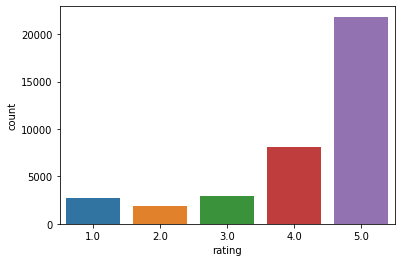

In [36]:
df5 = preprocessing(df_Wat)
df5

In [37]:
df55 = text_cleaning(df5)
df55

     ProductID                                        ProductName   Price  \
14  B000PDESIM  Momentum Men's 1M-DV50S1 M50 DSS Silver Dial B...  294.95   
21  B0007OEQZO  Citizen Women's EG2280-51E Eco-Drive Charm Bra...   99.99   
22  B0007OEQZO  Citizen Women's EG2280-51E Eco-Drive Charm Bra...   99.99   
23  B0007OEQZO  Citizen Women's EG2280-51E Eco-Drive Charm Bra...   99.99   
24  B0007OEQZO  Citizen Women's EG2280-51E Eco-Drive Charm Bra...   99.99   

            UserID  rating                       review_summary  \
14   AZMDNMPDWLLI3     5.0           Tough, Good Looking Watch!   
21  A2WRNZRR891JYA     5.0  $265 watch at $65!!! its a steal :)   
22  A29H29DRLPLQHS     5.0                           cute watch   
23  A3P3IZ23ULHRFW     5.0   What a gorgeous watch!!! (for $65)   
24   A8VPWEUHAUDMU     5.0            Beautiful Eco-Drive watch   

                                          review_text  
14  I purchased a Momentum M1 diver's watch for my...  
21  U cant get such a 

,UserID,ProductID,rating,tags
14,AZMDNMPDWLLI3,B000PDESIM,5.0,"T o u g h , G o o d L o o k i n g W a t c h..."
21,A2WRNZRR891JYA,B0007OEQZO,5.0,$ 2 6 5 w a t c h a t $ 6 5 ! ! ! i t s a...
22,A29H29DRLPLQHS,B0007OEQZO,5.0,c u t e w a t c h T h e w a t c h i s n i ...
23,A3P3IZ23ULHRFW,B0007OEQZO,5.0,W h a t a g o r g e o u s w a t c h ! ! ! ...
24,A8VPWEUHAUDMU,B0007OEQZO,5.0,B e a u t i f u l E c o - D r i v e w a t c ...
...,...,...,...,...
68340,AVI205DG7EPL1,B000HX2X1O,5.0,E x c e l l e n t W a t c h I b o u g h t t...
68341,A3NBHG35DAJV0C,B000HX2X1O,5.0,B u l o v a w o m e n ' s m a r i n e s t a...
68342,A2ENKMMP4T30K9,B000HX2X14,3.0,C h e c k t h e b a n d s i z e b e f o r ...
68343,A1ZABTAL4DGTYG,B000HX2X14,5.0,B u l o v a W a t c h T h e d i a m o n d s ...
